In [61]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

In [62]:
df = pd.read_csv('H2HBABBA2486_Data.csv')
df.shape

(50000, 19)

In [63]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799367,MCL associates,2019-11-18 00:00:00,2019.0,1.929872e+09,2019-09-13,20190913,20190913,20191117.0,USD,RV,1.0,NaN,925.75,20190913.0,NAGD,1.929872e+09,0
1,U001,0200762301,C&S WH trust,2019-07-23 00:00:00,2019.0,1.929586e+09,2019-07-08,20190707,20190708,20190723.0,USD,RV,1.0,NaN,86529.42,20190708.0,NAC6,1.929586e+09,0
2,U001,0200769623,WAL-MAR us,2019-11-05 00:00:00,2019.0,1.930049e+09,2019-10-25,20191024,20191025,20191109.0,USD,RV,1.0,NaN,478.14,20191025.0,NAH4,1.930049e+09,0
3,U001,0200769623,WAL-MAR in,2020-01-15 00:00:00,2020.0,1.930352e+09,2020-01-05,20200104,20200105,20200120.0,USD,RV,1.0,NaN,13989.29,20200105.0,NAH4,1.930352e+09,0
4,U001,0200741174,M B corp,2019-08-16 00:00:00,2019.0,1.929676e+09,2019-07-31,20190729,20190731,20190815.0,USD,RV,1.0,NaN,18638.80,20190731.0,NAA8,1.929676e+09,0


# **Cleaning The Data**

In [64]:
df.isnull().mean()

business_code             0.0000
cust_number               0.0000
name_customer             0.0000
clear_date                0.2000
buisness_year             0.0000
doc_id                    0.0000
posting_date              0.0000
document_create_date      0.0000
document_create_date.1    0.0000
due_in_date               0.0000
invoice_currency          0.0000
document type             0.0000
posting_id                0.0000
area_business             1.0000
total_open_amount         0.0000
baseline_create_date      0.0000
cust_payment_terms        0.0000
invoice_id                0.0001
isOpen                    0.0000
dtype: float64

In [65]:
# dropping area_business row because it contains all values as null
df.dropna(how='all', axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

In [66]:
df.drop(['document_create_date.1'], axis = 1, inplace=True)
df.reset_index(inplace=True, drop=True)

In [67]:
# dropping rows which contains Null values in ONLY invoice_id column.
df.dropna(subset=['invoice_id'], how='all', inplace=True)
df.reset_index(inplace=True, drop=True)

In [68]:
# Changing datatype of all the fileds containing Date to datetime data type.

df['clear_date']= pd.to_datetime(df['clear_date'], format='%Y-%m-%d')
df['buisness_year']= pd.to_datetime(df['buisness_year'], format='%Y')
df['posting_date']= pd.to_datetime(df['posting_date'], format='%Y-%m-%d')
# df['document_create_date']= pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date']= pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['due_in_date']= pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date']= pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

# data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'], format='%Y%m%d')

In [69]:
df['buisness_year'] = df['buisness_year'].dt.year

In [70]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
posting_id                     float64
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [71]:
# Dropping all the duplicate rows

df.drop_duplicates(keep='first',inplace=True)

In [72]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9702
buisness_year              0
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
document type              0
posting_id                 0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
invoice_id                 0
isOpen                     0
dtype: int64

In [73]:
df.isnull().mean()

business_code           0.000000
cust_number             0.000000
name_customer           0.000000
clear_date              0.198718
buisness_year           0.000000
doc_id                  0.000000
posting_date            0.000000
document_create_date    0.000000
due_in_date             0.000000
invoice_currency        0.000000
document type           0.000000
posting_id              0.000000
total_open_amount       0.000000
baseline_create_date    0.000000
cust_payment_terms      0.000000
invoice_id              0.000000
isOpen                  0.000000
dtype: float64

In [74]:
df.shape

(48823, 17)

# **Creating our Target column**

In [75]:
df['target'] = (df['clear_date'] - df['due_in_date']).dt.days

In [76]:
df.sort_values(by="posting_date",inplace=True)

In [77]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target
9064,U001,0200769623,WAL-MAR systems,2019-01-11,2019,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,23894.36,2018-12-30,NAH4,1.928542e+09,0,-3.0
19002,U001,0200762301,C&S WH foundation,2019-01-15,2019,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,52452.71,2018-12-30,NAC6,1.928538e+09,0,1.0
35030,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,63.60,2018-12-30,NAH4,1.928540e+09,0,-5.0
10427,U001,CCU013,KRAFT F corporation,2019-03-01,2019,1.928521e+09,2018-12-30,2018-12-31,2018-12-30,USD,RV,1.0,3876.08,2018-12-30,NAX2,1.928521e+09,0,61.0
36130,U001,0200749782,KROG foundation,2019-01-14,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,40777.56,2018-12-30,NAA8,1.928541e+09,0,0.0


In [78]:
# cleardate - due date
# Where clear date is null you need to predict the clear date
# Delay= Clear Date - Due date
# Clear Date = Due Date + Delay

# **Splitting The Data**

In [79]:
# print(df['document_create_date'].min())
# print(df['document_create_date'].max())

In [80]:
# Splitting the initial dataframe into train and test.
# So in this case we can consider last 3 months for test set.

# x_train = df[df['document_create_date'] <= '2020-02-01'].copy()
# x_test = df[df['document_create_date'] > '2020-03-01'].copy()

In [81]:
# creating the test data with all te null values we have in clear_date column

x_test = df[df['clear_date'].isna()]
x_test.shape

# dropping rows which contains Null values in ONLY clear_date column.

df.dropna(subset=['clear_date'], how='all', inplace=True)
df.reset_index(inplace=True, drop=True)
x_train = df

In [82]:
print(x_train.shape)
print(x_test.shape)

(39121, 18)
(9702, 18)


In [83]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target
0,U001,0200769623,WAL-MAR systems,2019-01-11,2019,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,23894.36,2018-12-30,NAH4,1.928542e+09,0,-3.0
1,U001,0200762301,C&S WH foundation,2019-01-15,2019,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,52452.71,2018-12-30,NAC6,1.928538e+09,0,1.0
2,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,63.60,2018-12-30,NAH4,1.928540e+09,0,-5.0
3,U001,CCU013,KRAFT F corporation,2019-03-01,2019,1.928521e+09,2018-12-30,2018-12-31,2018-12-30,USD,RV,1.0,3876.08,2018-12-30,NAX2,1.928521e+09,0,61.0
4,U001,0200749782,KROG foundation,2019-01-14,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,40777.56,2018-12-30,NAA8,1.928541e+09,0,0.0


In [84]:
x_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target
10065,U001,0200763489,GENERAL in,NaT,2020,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,104121.27,2020-02-27,NAA8,1.930577e+09,1,NaN
36395,U001,0200712187,SPAR,NaT,2020,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,54796.10,2020-02-27,NAA8,1.930577e+09,1,NaN
2724,U001,0200762301,C&S WH foundation,NaT,2020,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,57608.85,2020-02-27,NAC6,1.930577e+09,1,NaN
13923,U001,0200122006,LATIN corp,NaT,2020,1.930571e+09,2020-02-27,2020-02-26,2020-03-13,USD,RV,1.0,30521.80,2020-02-27,NAA8,1.930571e+09,1,NaN
42550,U001,0200726979,BJ'S us,NaT,2020,1.930572e+09,2020-02-27,2020-02-26,2020-03-13,USD,RV,1.0,435.00,2020-02-27,NAA8,1.930572e+09,1,NaN


In [85]:
x_train.isnull().sum(), x_test.isnull().sum()

(business_code           0
 cust_number             0
 name_customer           0
 clear_date              0
 buisness_year           0
 doc_id                  0
 posting_date            0
 document_create_date    0
 due_in_date             0
 invoice_currency        0
 document type           0
 posting_id              0
 total_open_amount       0
 baseline_create_date    0
 cust_payment_terms      0
 invoice_id              0
 isOpen                  0
 target                  0
 dtype: int64, business_code              0
 cust_number                0
 name_customer              0
 clear_date              9702
 buisness_year              0
 doc_id                     0
 posting_date               0
 document_create_date       0
 due_in_date                0
 invoice_currency           0
 document type              0
 posting_id                 0
 total_open_amount          0
 baseline_create_date       0
 cust_payment_terms         0
 invoice_id                 0
 isOpen             

# **EDA and Feature Engineering**

In [86]:
# business_code, invoice_currency, document type, posting_id, cust_payment_terms
print(dict(x_train['business_code'].value_counts()))
print(dict(x_test['business_code'].value_counts()))

{'U001': 35370, 'CA02': 3104, 'U013': 511, 'U002': 124, 'U005': 9, 'U007': 3}
{'U001': 8920, 'CA02': 695, 'U013': 63, 'U002': 19, 'U005': 4, 'U007': 1}


In [87]:
print(dict(x_train['invoice_currency'].value_counts()))
print(dict(x_test['invoice_currency'].value_counts()))

{'USD': 36016, 'CAD': 3105}
{'USD': 9007, 'CAD': 695}


In [88]:
print(dict(x_train['isOpen'].value_counts()))
print(dict(x_test['isOpen'].value_counts()))

{0: 39121}
{1: 9702}


In [89]:
print(dict(x_train['document type'].value_counts()))
print(dict(x_test['document type'].value_counts()))

{'RV': 39121}
{'RV': 9702}


In [90]:
print(dict(x_train['posting_id'].value_counts()))
print(dict(x_test['posting_id'].value_counts()))

{1.0: 39121}
{1.0: 9702}


In [91]:
print(dict(x_train['cust_payment_terms'].value_counts()))
print()
print(dict(x_test['cust_payment_terms'].value_counts()))

{'NAA8': 15592, 'NAH4': 10455, 'CA10': 3019, 'NAC6': 1327, 'NAM4': 1063, 'NAAX': 938, 'NAG2': 731, 'NAD1': 711, 'NAU5': 696, 'NAGD': 627, 'NA32': 585, 'NAX2': 553, 'NAM2': 458, 'NA10': 340, 'NAD5': 291, 'NAVF': 222, 'NAVE': 218, 'NAM1': 215, 'NAAW': 194, 'NAWU': 130, 'NAWN': 94, 'NAVQ': 82, 'NAVR': 77, 'NAWP': 74, 'NAUZ': 40, 'NAVM': 38, 'NA3B': 37, 'CA30': 36, 'NA38': 33, 'NACB': 31, 'NABG': 29, 'NAB1': 23, 'NAD4': 19, 'NAVL': 16, 'NA84': 15, 'NA3F': 11, 'C106': 10, 'NAVD': 9, 'BR56': 9, 'NAUP': 6, 'CAB1': 5, 'NA8Q': 5, 'NA25': 4, 'B052': 4, 'NAD8': 4, 'NAVC': 3, 'CAX2': 3, 'NAM3': 3, 'MC15': 3, 'NATJ': 3, 'NA9X': 3, 'NAWM': 2, 'NAUX': 2, 'BR12': 2, 'NATM': 2, 'NATW': 2, 'NAUW': 2, 'NA31': 2, 'NANC': 2, 'NATZ': 2, 'NATY': 1, 'NACE': 1, 'NAV2': 1, 'NATK': 1, 'NAUN': 1, 'NATL': 1, 'NAV9': 1, 'CA60': 1, '90M7': 1}

{'NAA8': 3927, 'NAH4': 2985, 'CA10': 686, 'NAC6': 414, 'NAGD': 277, 'NAAX': 261, 'NAM4': 233, 'NAU5': 201, 'NAD1': 106, 'NAM2': 100, 'NAG2': 80, 'NA10': 71, 'NA32': 64, 'NAX2'

In [92]:
x_train.describe()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,target
count,39121.000000,3.912100e+04,39121.0,39121.000000,3.912100e+04,39121.0,39121.000000
mean,2019.129751,2.012407e+09,1.0,31883.348189,2.012407e+09,0.0,0.899594
std,0.336034,2.784618e+08,0.0,39642.802795,2.784618e+08,0.0,11.201311
min,2019.000000,1.928502e+09,1.0,0.530000,1.928502e+09,0.0,-120.000000
25%,2019.000000,1.929175e+09,1.0,4591.350000,1.929175e+09,0.0,-3.000000
50%,2019.000000,1.929727e+09,1.0,17164.800000,1.929727e+09,0.0,0.000000
75%,2019.000000,1.930207e+09,1.0,46015.180000,1.930207e+09,0.0,2.000000
max,2020.000000,2.960617e+09,1.0,624300.230000,2.960617e+09,0.0,300.000000


In [93]:
# we get to see that posting_id and document type both have just one value for all data, so we remove them.
X_train = x_train.drop(['posting_id', 'document type'], axis = 1)
X_test = x_test.drop(['posting_id', 'document type'], axis = 1)

In [94]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target
0,U001,0200769623,WAL-MAR systems,2019-01-11,2019,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,USD,23894.36,2018-12-30,NAH4,1.928542e+09,0,-3.0
1,U001,0200762301,C&S WH foundation,2019-01-15,2019,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,52452.71,2018-12-30,NAC6,1.928538e+09,0,1.0
2,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,63.60,2018-12-30,NAH4,1.928540e+09,0,-5.0
3,U001,CCU013,KRAFT F corporation,2019-03-01,2019,1.928521e+09,2018-12-30,2018-12-31,2018-12-30,USD,3876.08,2018-12-30,NAX2,1.928521e+09,0,61.0
4,U001,0200749782,KROG foundation,2019-01-14,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,40777.56,2018-12-30,NAA8,1.928541e+09,0,0.0


In [95]:
z = pd.DataFrame(X_train.groupby(['business_code'], axis=0, as_index=False)['target'].mean())
print(z)

  business_code    target
0          CA02  6.153351
1          U001  0.310800
2          U002  6.500000
3          U005  6.000000
4          U007  3.333333
5          U013  8.277886


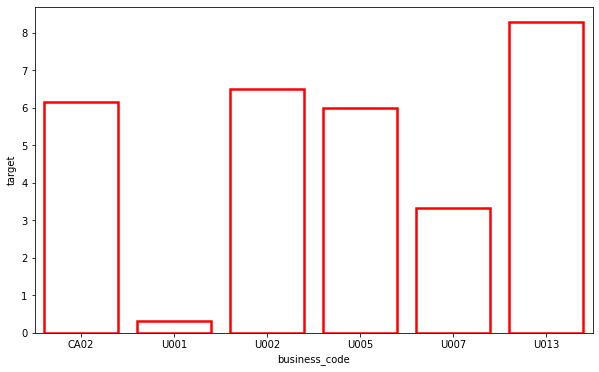

In [96]:
# Grouping data by business_code and plotting it all into graph to see its variation.

business_code_sns = pd.DataFrame(X_train.groupby(['business_code'], axis=0, as_index=False)['target'].mean())
plt.figure(figsize=(10,6))
sns.barplot(x="business_code", y="target",data=business_code_sns,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".4", edgecolor="red")

# The graph shows that U005 and U013 code are the ones that delay their payments.

In [97]:
# We can see that here we have invoice_currency as USD and CAD only.
# Encoding the binary categorical column invoice_currency.
# So basically we are just using 0 for USD and 1 for CAD

X_train['invoice_currency'] = X_train['invoice_currency'].map({'USD': 0,'CAD': 1})
X_test['invoice_currency'] = X_test['invoice_currency'].map({'USD': 0,'CAD': 1})

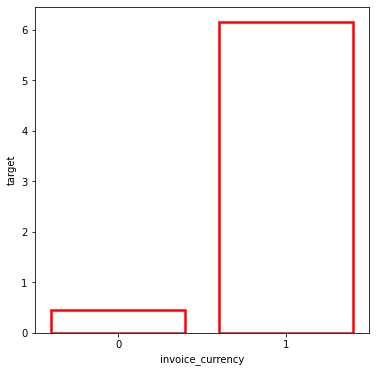

In [98]:
invoice_currency_sns = pd.DataFrame(X_train.groupby(['invoice_currency'], axis=0, as_index=False)['target'].mean())
plt.figure(figsize=(6,6))
sns.barplot(x="invoice_currency", y="target",data=invoice_currency_sns,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor="red")

# This shows that the clients that pay in USD currency does very less delay than those who do in CAD

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


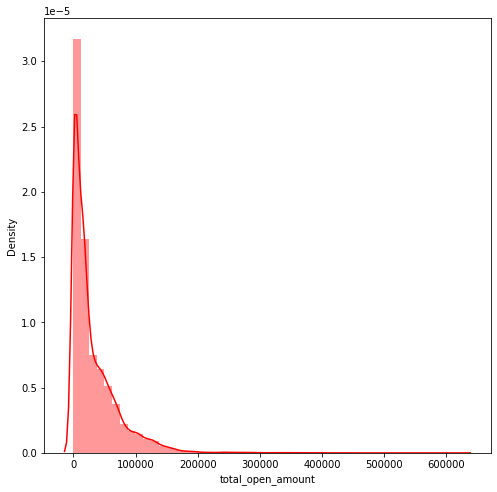

In [99]:
plt.figure(figsize=(8,8))
plt.figure(1)
sns.distplot(X_train['total_open_amount'],color='red')

# This shows the amount column is totally right skewed which puts strain on the bias of this data.

In [100]:
# Using log transformation to make it more 'normal' for better analysis
def Transform(x):
    return np.log(x)

X_train['total_open_amount'] = X_train['total_open_amount'].apply(Transform)
X_test['total_open_amount'] = X_test['total_open_amount'].apply(Transform)

In [101]:
# To get the unique number of customers
X_train['cust_number'].nunique()

1351

In [102]:
# To get the unique number of invoice_id
# This pretty much doesnt give much info as its unique for each row
X_train['invoice_id'].nunique()

39121

In [103]:
# Dropping those columns which don't contribute anything for predictions.
X_train = X_train.drop(['buisness_year', 'due_in_date', 'isOpen'], axis = 1)
X_test = X_test.drop(['buisness_year', 'due_in_date', 'isOpen'], axis = 1)

In [104]:
X_train.head(1)

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,target
0,U001,0200769623,WAL-MAR systems,2019-01-11,1.928542e+09,2018-12-30,2018-12-29,0,10.081398,2018-12-30,NAH4,1.928542e+09,-3.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x432 with 0 Axes>

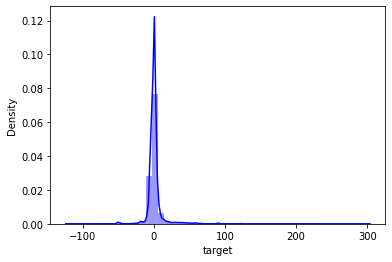

In [105]:
plt.figure(figsize=(6,6))
plt.figure(2)
sns.distplot(X_train['target'],color='blue')

# This value is almost symmetric i.e. normalised already.

In [106]:
# In this we are trying to convert cust_number into the count of each cust_number
# since cust_number is unique we had to perform this step so as to convert it into a feature

def integers(x):
    ref = dict(X_train['cust_number'].value_counts())
    if ref.get(x):
        return ref[x]

X_train['cust_number'] = X_train['cust_number'].apply(integers)

def integers_test(x):
    ref = dict(X_test['cust_number'].value_counts())
    if ref.get(x):
        return ref[x]

X_test['cust_number'] = X_test['cust_number'].apply(integers_test)

In [107]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,target
0,U001,8829,WAL-MAR systems,2019-01-11,1.928542e+09,2018-12-30,2018-12-29,0,10.081398,2018-12-30,NAH4,1.928542e+09,-3.0
1,U001,1152,C&S WH foundation,2019-01-15,1.928538e+09,2018-12-30,2018-12-29,0,10.867667,2018-12-30,NAC6,1.928538e+09,1.0
2,U001,8829,WAL-MAR,2019-01-09,1.928540e+09,2018-12-30,2018-12-29,0,4.152613,2018-12-30,NAH4,1.928540e+09,-5.0
3,U001,544,KRAFT F corporation,2019-03-01,1.928521e+09,2018-12-30,2018-12-31,0,8.262580,2018-12-30,NAX2,1.928521e+09,61.0
4,U001,65,KROG foundation,2019-01-14,1.928541e+09,2018-12-30,2018-12-29,0,10.615887,2018-12-30,NAA8,1.928541e+09,0.0


In [108]:
# It is clear that 'U002', 'U005', 'U007' business_codes are very much less in number and therefore we can merge them all under one field.
# In the business_code column we can see they are categorical ones, so we make new feature out of them.

X_train = X_train.replace(['U002', 'U005', 'U007'], 'other')
X_test = X_test.replace(['U002', 'U005', 'U007'], 'other')

business = pd.get_dummies(X_train['business_code'])
business1 = pd.get_dummies(X_test['business_code'])

X_train = pd.concat([X_train, business], axis=1)
X_test = pd.concat([X_test, business1], axis=1)

X_train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,target,CA02,U001,U013,other
0,U001,8829,WAL-MAR systems,2019-01-11,1.928542e+09,2018-12-30,2018-12-29,0,10.081398,2018-12-30,NAH4,1.928542e+09,-3.0,0,1,0,0
1,U001,1152,C&S WH foundation,2019-01-15,1.928538e+09,2018-12-30,2018-12-29,0,10.867667,2018-12-30,NAC6,1.928538e+09,1.0,0,1,0,0
2,U001,8829,WAL-MAR,2019-01-09,1.928540e+09,2018-12-30,2018-12-29,0,4.152613,2018-12-30,NAH4,1.928540e+09,-5.0,0,1,0,0
3,U001,544,KRAFT F corporation,2019-03-01,1.928521e+09,2018-12-30,2018-12-31,0,8.262580,2018-12-30,NAX2,1.928521e+09,61.0,0,1,0,0
4,U001,65,KROG foundation,2019-01-14,1.928541e+09,2018-12-30,2018-12-29,0,10.615887,2018-12-30,NAA8,1.928541e+09,0.0,0,1,0,0


In [109]:
# creating a new feature from baseline column.
X_train['baseline_quater']= pd.to_datetime(X_train['baseline_create_date']).dt.quarter
X_test['baseline_quater']= pd.to_datetime(X_test['baseline_create_date']).dt.quarter

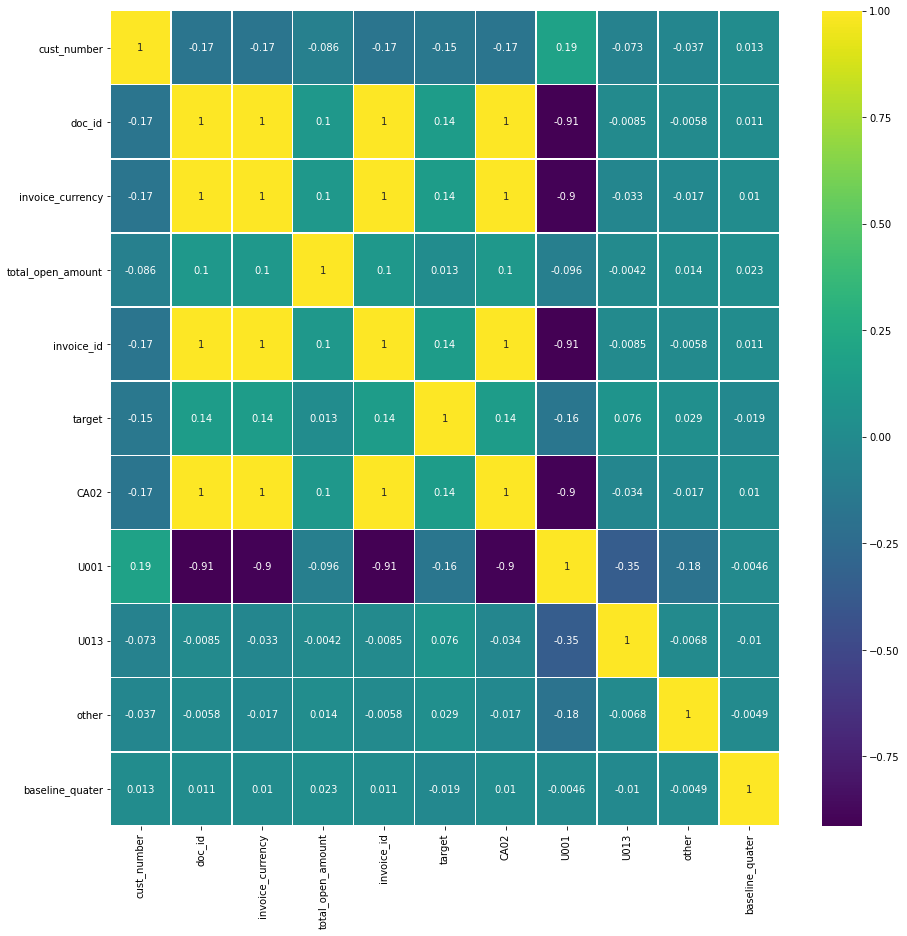

In [110]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,cmap='viridis',linewidths=.5)

In [111]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,target,CA02,U001,U013,other,baseline_quater
0,U001,8829,WAL-MAR systems,2019-01-11,1.928542e+09,2018-12-30,2018-12-29,0,10.081398,2018-12-30,NAH4,1.928542e+09,-3.0,0,1,0,0,4
1,U001,1152,C&S WH foundation,2019-01-15,1.928538e+09,2018-12-30,2018-12-29,0,10.867667,2018-12-30,NAC6,1.928538e+09,1.0,0,1,0,0,4
2,U001,8829,WAL-MAR,2019-01-09,1.928540e+09,2018-12-30,2018-12-29,0,4.152613,2018-12-30,NAH4,1.928540e+09,-5.0,0,1,0,0,4
3,U001,544,KRAFT F corporation,2019-03-01,1.928521e+09,2018-12-30,2018-12-31,0,8.262580,2018-12-30,NAX2,1.928521e+09,61.0,0,1,0,0,4
4,U001,65,KROG foundation,2019-01-14,1.928541e+09,2018-12-30,2018-12-29,0,10.615887,2018-12-30,NAA8,1.928541e+09,0.0,0,1,0,0,4


In [112]:
# dropping columns that won't help in predictions. Note on feature has high correlation with target variable.
X_train = X_train.drop(['doc_id', 'invoice_id','business_code', 'name_customer', 'clear_date',
                       'posting_date', 'document_create_date', 'baseline_create_date', 'cust_payment_terms'], axis = 1)

# Notice that i have removed one extra column in test data i.e. target column because that is what we need to find out.
X_test = X_test.drop(['doc_id', 'invoice_id','business_code', 'name_customer', 'clear_date',
                       'posting_date', 'document_create_date', 'baseline_create_date', 'cust_payment_terms', 'target'], axis = 1)

In [113]:
X_train.head(1)

,cust_number,invoice_currency,total_open_amount,target,CA02,U001,U013,other,baseline_quater
0,8829,0,10.081398,-3.0,0,1,0,0,4


In [114]:
X_test.head(1)

,cust_number,invoice_currency,total_open_amount,CA02,U001,U013,other,baseline_quater
10065,7,0,11.553312,0,1,0,0,1


# **Training and Splitting the data into Train, Validation and Test Data**

In [115]:
# Setting up our X and Y axis i.e. input(X axis) and output(Y axis) i.e. target value.
# Splitting out training data into new Train data and Validation data.

y = X_train['target']
X_train = X_train.drop(['target'], axis = 1)
Xtrain ,Xval, ytrain, yval = train_test_split(X_train, y, test_size = 0.2, random_state=0)

In [116]:
# checking if there are any Null values in our traing data Y axis(target value).

ytrain.isnull().sum()

0

In [117]:
# checking if there are any Null values in our traing data X axis.

Xtrain.isnull().sum()

cust_number          0
invoice_currency     0
total_open_amount    0
CA02                 0
U001                 0
U013                 0
other                0
baseline_quater      0
dtype: int64

# **Random Forest Model**

In [118]:
# Creating the RandomForest model with number of trees = 500 to get better performance.

RF_model = RandomForestRegressor(n_estimators=500)

In [119]:
# Fit the model with our training data.
RF_model.fit(Xtrain, ytrain)

# predicting the output on the basis of validation data to check how our model will perform.
predict = RF_model.predict(Xval)

In [120]:
#Checking the accuracy of our model

accuracy_train = round(RF_model.score(Xtrain, ytrain)*100,2)
print(round(accuracy_train,2),'%')

88.43 %


In [121]:
#Checking the accuracy of our model

accuracy_val = round(RF_model.score(Xval, yval)*100,2)
print(round(accuracy_val,2),'%')

27.06 %


In [122]:
Output = RF_model.predict(X_test)
Output

array([ -0.868,   2.266,   2.152, ..., -11.36 ,  -6.88 ,   0.456])

# **Exporting the model**

In [123]:
# Exporting the model

import pickle

Pkl_Filename = "Pickle_RF_model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(RF_model, file)